xercise #3
Hanie & Ali

[EuroSAT](https://zenodo.org/records/7711810#.ZAm3k-zMKEA) is a land use and land cover classification dataset. The dataset is based on Sentinel-2 satellite imagery covering 13 spectral bands and consists of 10 Land Use and Land Cover (LULC) classes with a total of 27,000 labeled and geo-referenced images. 

Using the following code, you can create a DataFrame that includes columns detailing the center locations of the images and their corresponding Land Use and Land Cover (LULC) classes.

Your task: Perform **supervised Machine Learning (ML)** on this dataset. You should use **Dask** in your implementation. You may follow these key steps:
- Create relevant features and analyse them using some visualizations and statistical tools. You can start with features representing the mean and range of spectral bands in these images. You are free to explore more relevant features.
- Split the dataset into training, validation, and test sets.
- Choose an appropriate ML algorithm.
- Train and assess the model's performance.
- Adjust the model's hyperparameters to optimize its performance.

In [1]:
import rasterio
import rasterio.features
import rasterio.warp
import geojson

In [2]:
import os
from os.path import isfile, join
import pandas as pd

In [3]:
directory_path = '/data/shared/Big-Geodata-Processing-2023-1A/Exercise3/EuroSAT_MS/'

In [4]:
# function to get the center coordinate of the image
def get_cent(filename):
    with rasterio.open(filename) as dataset:
        # Read the dataset's valid data mask as a ndarray.
        mask = dataset.dataset_mask()

        # Extract feature shapes and values from the array.
        for geom, val in rasterio.features.shapes(
                mask, transform=dataset.transform):

            # Transform shapes from the dataset's own coordinate
            # reference system to CRS84 (EPSG:4326).
            geom = rasterio.warp.transform_geom(
                dataset.crs, 'EPSG:4326', geom, precision=6)
            ls = list(geojson.utils.coords(geom))
            x = []
            y = []
            for row in ls:
                x.append(row[0])
                y.append(row[1])
            cent = [min(y)+(max(y)-min(y))/2,min(x)+(max(x)-min(x))/2]
    return cent

In [5]:
subfolders = [ f.path for f in os.scandir(directory_path) if f.is_dir() ]

In [6]:
df = pd.DataFrame(columns=["Lat", "Lon", "Class"])
for i in range(len(subfolders)):
    image_path = subfolders[i]
    class_name = os.path.basename(image_path)
    all_images = [f for f in os.listdir(image_path) if os.path.isfile(join(image_path, f))]
    print(class_name,len(all_images))
    for j in range(len(all_images)):
        cent = get_cent(image_path+'/'+all_images[j])
        new_row = pd.DataFrame({"Lat": cent[0], "Lon": cent[1], "Class": class_name}, index=[0])
        df = pd.concat([df, new_row], ignore_index=True)
        

Residential 3000
Pasture 2000
SeaLake 3000
HerbaceousVegetation 3000
Forest 3000
Industrial 2500
River 2500
PermanentCrop 2500
AnnualCrop 3000
Highway 2500


In [7]:
df

,Lat,Lon,Class
0,51.636699,0.409756,Residential
1,43.677658,7.113914,Residential
2,51.630671,-0.732539,Residential
3,52.333434,8.017260,Residential
4,43.730154,7.160103,Residential
...,...,...,...
26995,49.216428,16.408736,Highway
26996,49.082481,2.728486,Highway
26997,37.763857,-3.719099,Highway
26998,50.744405,4.544050,Highway


Visualization

As an example, one image is selected to be extracted related statistics

In [9]:
filename_image = directory_path+"AnnualCrop/AnnualCrop_1.tif"

In [10]:
with rasterio.open(filename_image, 'r') as ds:
    img = ds.read()  # read all raster values


In [11]:
dataset = rasterio.open(directory_path+"AnnualCrop/AnnualCrop_1.tif")

In [13]:
dataset.indexes
(1,)
band1 = dataset.read(1)
band1

array([[1420, 1420, 1419, ..., 1291, 1298, 1306],
       [1420, 1420, 1419, ..., 1291, 1298, 1306],
       [1417, 1417, 1416, ..., 1291, 1299, 1306],
       ...,
       [1371, 1371, 1364, ..., 1307, 1306, 1306],
       [1367, 1367, 1360, ..., 1310, 1309, 1308],
       [1362, 1362, 1356, ..., 1312, 1311, 1311]], dtype=uint16)

In [14]:
dataset.indexes
(2,)
band2 = dataset.read(2)
band2

array([[1291, 1291, 1280, ..., 1083, 1098, 1087],
       [1291, 1291, 1280, ..., 1083, 1098, 1087],
       [1269, 1269, 1283, ..., 1093, 1080, 1091],
       ...,
       [1271, 1271, 1250, ..., 1097, 1085, 1090],
       [1230, 1230, 1227, ..., 1113, 1113, 1130],
       [1185, 1185, 1185, ..., 1102, 1117, 1129]], dtype=uint16)

In [15]:
dataset.indexes
(3,)
band3 = dataset.read(3)
band3

array([[1291, 1291, 1281, ...,  978,  982,  988],
       [1291, 1291, 1281, ...,  978,  982,  988],
       [1257, 1257, 1262, ...,  990,  981,  978],
       ...,
       [1244, 1244, 1225, ...,  977,  972,  979],
       [1197, 1197, 1184, ..., 1001, 1009, 1023],
       [1142, 1142, 1116, ..., 1015, 1014, 1033]], dtype=uint16)

In [16]:
dataset.indexes
(4,)
band4 = dataset.read(4)
band4

array([[1600, 1600, 1589, ..., 1086, 1117, 1100],
       [1600, 1600, 1589, ..., 1086, 1117, 1100],
       [1550, 1550, 1546, ..., 1100, 1102, 1103],
       ...,
       [1523, 1523, 1509, ..., 1102, 1086, 1087],
       [1420, 1420, 1382, ..., 1123, 1129, 1153],
       [1314, 1314, 1286, ..., 1126, 1140, 1171]], dtype=uint16)

In [17]:
dataset.indexes
(5,)
band5 = dataset.read(5)
band5

array([[1680, 1680, 1670, ..., 1169, 1145, 1132],
       [1680, 1680, 1670, ..., 1169, 1145, 1132],
       [1666, 1666, 1655, ..., 1164, 1145, 1135],
       ...,
       [1687, 1687, 1557, ..., 1138, 1133, 1131],
       [1572, 1572, 1465, ..., 1156, 1154, 1154],
       [1502, 1502, 1405, ..., 1164, 1162, 1163]], dtype=uint16)

In [18]:
dataset.indexes
(6,)
band6 = dataset.read(6)
band6

array([[1841, 1841, 1828, ..., 1296, 1254, 1230],
       [1841, 1841, 1828, ..., 1296, 1254, 1230],
       [1824, 1824, 1811, ..., 1287, 1250, 1231],
       ...,
       [1988, 1988, 1812, ..., 1232, 1229, 1226],
       [1890, 1890, 1723, ..., 1253, 1252, 1250],
       [1834, 1834, 1661, ..., 1260, 1259, 1258]], dtype=uint16)

In [19]:
dataset.indexes
(7,)
band7 = dataset.read(7)
band7

array([[2045, 2045, 2033, ..., 1447, 1391, 1361],
       [2045, 2045, 2033, ..., 1447, 1391, 1361],
       [2028, 2028, 2013, ..., 1440, 1392, 1370],
       ...,
       [2249, 2249, 2036, ..., 1363, 1361, 1362],
       [2144, 2144, 1940, ..., 1390, 1390, 1392],
       [2076, 2076, 1871, ..., 1406, 1404, 1404]], dtype=uint16)

In [20]:
dataset.indexes
(8,)
band8 = dataset.read(8)
band8

array([[2016, 2016, 1999, ..., 1368, 1391, 1341],
       [2016, 2016, 1999, ..., 1368, 1391, 1341],
       [1952, 1952, 1963, ..., 1374, 1387, 1355],
       ...,
       [2284, 2284, 2114, ..., 1327, 1314, 1333],
       [2170, 2170, 2003, ..., 1413, 1388, 1403],
       [2165, 2165, 1870, ..., 1430, 1414, 1428]], dtype=uint16)

In [21]:
dataset.indexes
(9,)
band9 = dataset.read(9)
band9

array([[546, 546, 545, ..., 442, 438, 439],
       [546, 546, 545, ..., 442, 438, 439],
       [541, 541, 541, ..., 444, 440, 441],
       ...,
       [521, 521, 501, ..., 375, 374, 374],
       [512, 512, 492, ..., 378, 377, 376],
       [502, 502, 483, ..., 380, 379, 379]], dtype=uint16)

In [22]:
dataset.indexes
(10,)
band10 = dataset.read(10)
band10

array([[13, 13, 13, ..., 12, 12, 12],
       [13, 13, 13, ..., 12, 12, 12],
       [12, 12, 13, ..., 12, 12, 12],
       ...,
       [12, 12, 12, ..., 12, 12, 12],
       [12, 12, 12, ..., 11, 12, 12],
       [12, 12, 12, ..., 11, 11, 12]], dtype=uint16)

In [23]:
dataset.indexes
(11,)
band11 = dataset.read(11)
band11

array([[3083, 3083, 3079, ..., 2522, 2536, 2549],
       [3083, 3083, 3079, ..., 2522, 2536, 2549],
       [3077, 3077, 3068, ..., 2531, 2550, 2563],
       ...,
       [2999, 2999, 2891, ..., 2462, 2456, 2454],
       [2880, 2880, 2800, ..., 2487, 2482, 2481],
       [2795, 2795, 2728, ..., 2500, 2495, 2493]], dtype=uint16)

In [24]:
dataset.indexes
(12,)
band12 = dataset.read(12)
band12

array([[2325, 2325, 2323, ..., 2016, 2082, 2116],
       [2325, 2325, 2323, ..., 2016, 2082, 2116],
       [2324, 2324, 2321, ..., 2032, 2095, 2126],
       ...,
       [2045, 2045, 2052, ..., 2044, 2038, 2035],
       [1992, 1992, 2014, ..., 2063, 2056, 2052],
       [1953, 1953, 1984, ..., 2074, 2066, 2062]], dtype=uint16)

In [25]:
dataset.indexes
(13,)
band13 = dataset.read(13)
band13

array([[2319, 2319, 2306, ..., 1648, 1598, 1580],
       [2319, 2319, 2306, ..., 1648, 1598, 1580],
       [2299, 2299, 2286, ..., 1647, 1599, 1581],
       ...,
       [2584, 2584, 2305, ..., 1550, 1541, 1539],
       [2445, 2445, 2197, ..., 1579, 1574, 1574],
       [2359, 2359, 2131, ..., 1593, 1589, 1589]], dtype=uint16)

In [26]:
import numpy as np
import matplotlib.pyplot as plt

In [27]:
# Create a list of arrays (band1, band2, ..., band13)
bands = [
    band1,band2,band3,band4,band5,band6,band7,band8,band9,band10,band11,band12,band13
    # Add your other arrays here
]


In [28]:
minimums = [np.min(band) for band in bands]
maximums = [np.max(band) for band in bands]
means = [np.mean(band) for band in bands]


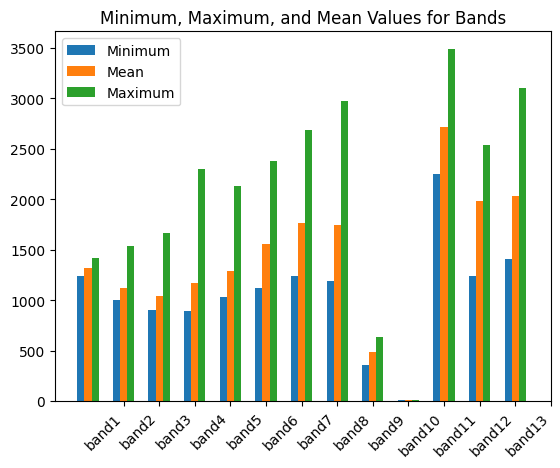

In [29]:
# Create a list of labels for the statistics
labels = ['Minimum', 'Mean', 'Maximum']

# Create lists of values for each statistic
values = [minimums, means, maximums]

# Set the number of bands (in this case, 13)
num_bands = len(bands)

# Set the width of each bar
bar_width = 0.2

# Create the x-axis positions for the bars
x = np.arange(num_bands)

# Create a bar for each statistic
for i in range(len(labels)):
    plt.bar(x + i * bar_width, values[i], width=bar_width, label=labels[i])

# Add labels to the bars
#for i, val in enumerate(values):
#    for j, v in enumerate(val):
 #       plt.text(x[j] + i * bar_width, v, str(v), ha='center', va='bottom')

# Add x-axis labels (band labels) with rotation and right alignment
plt.xticks(x + bar_width * (num_bands - 1) / 2, [f'band{i}' for i in range(1, num_bands + 1)], rotation=45, ha="right")

# Add a title to the chart
plt.title('Minimum, Maximum, and Mean Values for Bands')

# Add a legend
plt.legend()

# Show the chart
plt.show()




Classification using machine learning

In [30]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

n_samples = 27000

X, y = make_blobs(n_samples, centers = 10, n_features = 10, random_state=1)
print(X.shape)

(27000, 10)


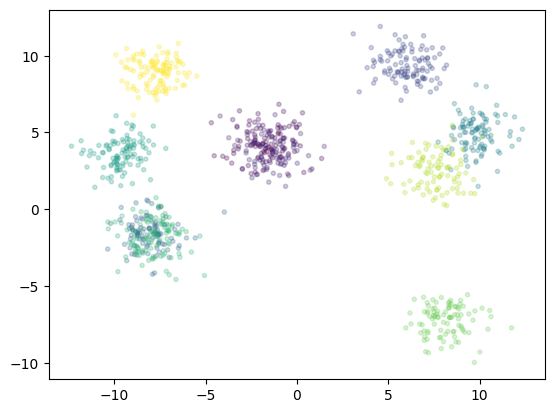

In [31]:
plt.scatter(X[:1000, 0], X[:1000, 1], marker='.', c=y[:1000], cmap='viridis', alpha=0.25)

In [10]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=42)

print(X.shape, y.shape)
print(Xtrain.shape, Xtest.shape)
print(ytrain.shape, ytest.shape)

(27000, 10) (27000,)
(18900, 10) (8100, 10)
(18900,) (8100,)


In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(Xtrain)
Xtrain = scaler.transform(Xtrain)
Xtest = scaler.transform(Xtest)

In [12]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(hidden_layer_sizes=(10,2))

In [13]:
%%time
# training phase
clf.fit(Xtrain, ytrain)

# classification (prediction) phase
y_hat_skl = clf.predict(Xtest)

CPU times: user 8.88 s, sys: 105 ms, total: 8.99 s
Wall time: 8.86 s


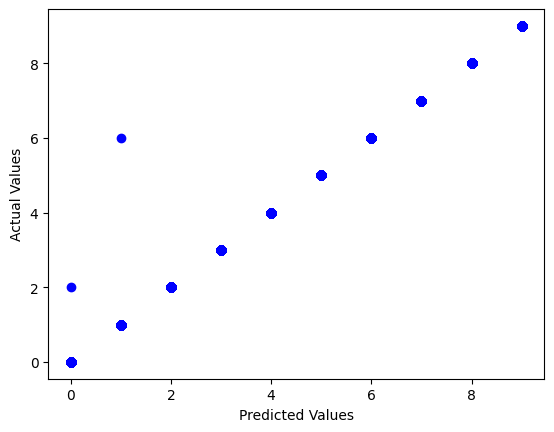

In [14]:
plt.scatter(y_hat_skl, ytest,c='b')
#plt.scatter(ytest, ytest,c='k')
#plt.title('Scatter plot')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [15]:
from dask.distributed import Client
client = Client()

In [16]:
import dask.array as da
Xd = da.from_array(X, chunks=27000)
yd = da.from_array(y, chunks=27000)

In [17]:
yd.compute()

array([1, 1, 0, ..., 8, 6, 0])

In [18]:
# Train-Test split
import dask_ml.model_selection as ms
Xdtrain, Xdtest, ydtrain, ydtest = ms.train_test_split(Xd, yd, test_size=0.3, random_state=42)

In [19]:
# Scaling
import dask_ml.preprocessing as pr
scaler = pr.StandardScaler()
scaler.fit(Xdtrain)
Xdtrain = scaler.transform(Xdtrain)
Xdtest = scaler.transform(Xdtest)

In [20]:
Xdtrain

dask.array<truediv, shape=(18900, 10), dtype=float64, chunksize=(18900, 10), chunktype=numpy.ndarray>

In [21]:
Xdtest

dask.array<truediv, shape=(8100, 10), dtype=float64, chunksize=(8100, 10), chunktype=numpy.ndarray>

In [22]:
from sklearn.neural_network import MLPClassifier
from joblib import parallel_backend

In [23]:
clf = MLPClassifier(hidden_layer_sizes=(10, 2), random_state=1)

In [24]:
%%time
# Training an MLP model and classification
with parallel_backend('dask'):
    clf.fit(Xdtrain, ydtrain)
    yd_hat = clf.predict(Xdtest)

CPU times: user 15.3 s, sys: 1.27 s, total: 16.6 s
Wall time: 20 s


In [25]:
print(ytest[:10])
print(y_hat_skl[:10])

[4 9 2 7 7 3 5 2 0 7]
[4 9 2 7 7 3 5 2 0 7]


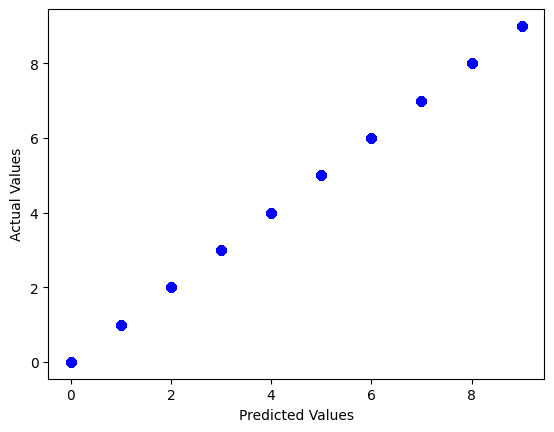

In [26]:
plt.scatter(yd_hat, ydtest,c='b')
#plt.scatter(ytest, ytest,c='k')
#plt.title('Scatter plot')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

------ Optimization ------ 

In [27]:
%matplotlib inline

In [29]:
from distributed import Client
client = Client(processes=False, threads_per_worker=2,
                n_workers=1, memory_limit='8GB')
client

/usr/local/lib/python3.8/dist-packages/distributed/node.py:183: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 35421 instead
  warnings.warn(


Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://172.18.0.4:35421/status,
Dashboard: http://172.18.0.4:35421/status,Workers: 1
Total threads: 2,Total memory: 7.45 GiB
Status: running,Using processes: False
Comm: inproc://172.18.0.4/273/9,Workers: 1
Dashboard: http://172.18.0.4:35421/status,Total threads: 2
Started: Just now,Total memory: 7.45 GiB
Comm: inproc://172.18.0.4/273/12,Total threads: 2
Dashboard: http://172.18.0.4:43819/status,Memory: 7.45 GiB
Nanny: None,


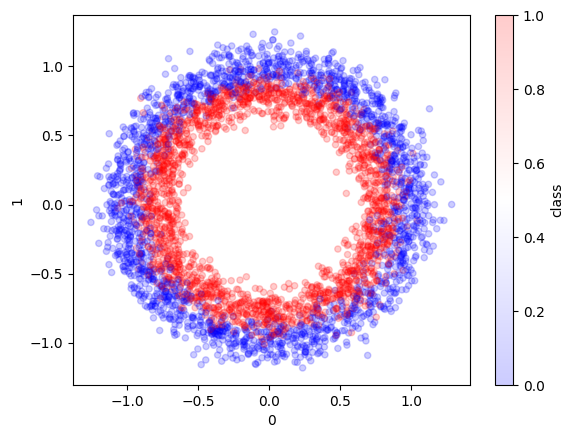

In [39]:
from sklearn.datasets import make_circles
import numpy as np
import pandas as pd
from skimage import io
from sklearn.preprocessing import StandardScaler

image_dir = '/data/shared/Big-Geodata-Processing-2023-1A/Exercise3/EuroSAT_MS/'


for filename in os.listdir(image_dir):
    if filename.endswith('.tif'):
        # Create the full file path
        image_path = os.path.join(image_dir, filename)

        # Load and process the image using rasterio
        with rasterio.open(image_path) as src:
            image = src.read(1)  # Assuming a single-band image (modify if you have multi-band)
        

X, y = make_circles(n_samples=27_000, random_state=0, noise=0.09)

pd.DataFrame({0: X[:, 0], 1: X[:, 1], "class": y}).sample(4_000).plot.scatter(
    x=0, y=1, alpha=0.2, c="class", cmap="bwr"
);

In [3]:
from sklearn.utils import check_random_state

rng = check_random_state(42)
random_feats = rng.uniform(-1, 1, size=(X.shape[0], 4))
X = np.hstack((X, random_feats))
X

array([[-0.3979998 , -1.0347746 , -0.25091976,  0.90142861,  0.46398788,
         0.19731697],
       [-0.78925146,  0.10099755, -0.68796272, -0.68801096, -0.88383278,
         0.73235229],
       [-0.55579671, -0.55817125,  0.20223002,  0.41614516, -0.95883101,
         0.9398197 ],
       ...,
       [-0.17070238, -1.01796778, -0.17195063, -0.10772905, -0.50787432,
         0.58981792],
       [ 0.35076462, -1.07490142, -0.60951614,  0.07860909, -0.35510734,
         0.43798303],
       [ 0.32812697,  1.08819604,  0.38238141,  0.39663294,  0.77066811,
         0.56153793]])

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=5_000, random_state=42)

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
scaler = StandardScaler().fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
from dask.utils import format_bytes

for name, X in [("train", X_train), ("test", X_test)]:
    print("dataset =", name)
    print("shape =", X.shape)
    print("bytes =", format_bytes(X.nbytes))
    print("-" * 20)

dataset = train
shape = (22000, 6)
bytes = 1.01 MiB
--------------------
dataset = test
shape = (5000, 6)
bytes = 234.38 kiB
--------------------


In [7]:
import numpy as np
from sklearn.neural_network import MLPClassifier

model = MLPClassifier()

In [8]:
params = {
    "hidden_layer_sizes": [
        (24, ),
        (12, 12),
        (6, 6, 6, 6),
        (4, 4, 4, 4, 4, 4),
        (12, 6, 3, 3),
    ],
    "activation": ["relu", "logistic", "tanh"],
    "alpha": np.logspace(-6, -3, num=1000),  # cnts
    "batch_size": [16, 32, 64, 128, 256, 512],
}

In [9]:
from dask_ml.model_selection import HyperbandSearchCV

In [10]:
# For quick response
n_examples = 4 * len(X_train)
n_params = 8

# In practice, HyperbandSearchCV is most useful for longer searches
# n_examples = 15 * len(X_train)
# n_params = 15

In [11]:
max_iter = n_params  # number of times partial_fit will be called
chunks = n_examples // n_params  # number of examples each call sees

max_iter, chunks

(8, 11000)

In [12]:
import dask.array as da
X_train2 = da.from_array(X_train, chunks=chunks)
y_train2 = da.from_array(y_train, chunks=chunks)
X_train2

dask.array<array, shape=(22000, 6), dtype=float64, chunksize=(11000, 6), chunktype=numpy.ndarray>

In [13]:
search = HyperbandSearchCV(
    model,
    params,
    max_iter=max_iter,
    patience=True,
)

In [14]:
search.metadata["partial_fit_calls"]

26

In [15]:
import dask.dataframe as dd
from dask_ml.model_selection import train_test_split
from dask_ml.linear_model import LogisticRegression
from dask_ml.metrics import accuracy_score

In [16]:
%%time
search.fit(X_train2, y_train2, classes=[0, 1, 2, 3])

/usr/local/lib/python3.8/dist-packages/dask_ml/model_selection/_incremental.py:642: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  cv_results = {k: np.array(v) for k, v in cv_results.items()}
/usr/local/lib/python3.8/dist-packages/dask_ml/model_selection/_incremental.py:642: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  cv_results = {k: np.array(v) for k, v in cv_results.items()}
/usr/local/lib/python3.8/dist-packages/dask_ml/model_selection/_hyperband.py:455: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list

CPU times: user 19.2 s, sys: 23.1 s, total: 42.3 s
Wall time: 3.04 s


HyperbandSearchCV(estimator=MLPClassifier(), max_iter=8,
                  parameters={'activation': ['relu', 'logistic', 'tanh'],
                              'alpha': array([1.00000000e-06, 1.00693863e-06, 1.01392541e-06, 1.02096066e-06,
       1.02804473e-06, 1.03517796e-06, 1.04236067e-06, 1.04959323e-06,
       1.05687597e-06, 1.06420924e-06, 1.07159340e-06, 1.07902879e-06,
       1.08651577e-06, 1.09405471e-06, 1.10164595e-06, 1.1...
       9.01477631e-04, 9.07732653e-04, 9.14031075e-04, 9.20373200e-04,
       9.26759330e-04, 9.33189772e-04, 9.39664831e-04, 9.46184819e-04,
       9.52750047e-04, 9.59360829e-04, 9.66017480e-04, 9.72720319e-04,
       9.79469667e-04, 9.86265846e-04, 9.93109181e-04, 1.00000000e-03]),
                              'batch_size': [16, 32, 64, 128, 256, 512],
                              'hidden_layer_sizes': [(24,), (12, 12),
                                                     (6, 6, 6, 6),
                                                     (4, 4, 4, 4, 4, 4),
                                                     (12, 6, 3, 3)]},
                  patience=True)

In [17]:
search.best_score_

0.4979545454545454

In [18]:
search.best_estimator_

MLPClassifier(activation='logistic', alpha=0.0009727203192450537,
              batch_size=128, hidden_layer_sizes=(24,))

In [19]:
cv_results = pd.DataFrame(search.cv_results_)
cv_results.head()

,mean_partial_fit_time,test_score,std_score_time,param_activation,partial_fit_calls,mean_score_time,rank_test_score,param_batch_size,std_partial_fit_time,params,param_hidden_layer_sizes,bracket,param_alpha,model_id
0,0.276263,0.500000,0.000778,tanh,2,0.011276,1,32,0.009674,"{'hidden_layer_sizes': (4, 4, 4, 4, 4, 4), 'ba...","(4, 4, 4, 4, 4, 4)",1,0.000019,bracket=1-0
1,0.222856,0.499091,0.009141,logistic,2,0.021299,2,16,0.001430,"{'hidden_layer_sizes': (24,), 'batch_size': 16...","(24,)",1,0.000004,bracket=1-1
2,0.436798,0.497955,0.002343,logistic,4,0.017998,3,128,0.461222,"{'hidden_layer_sizes': (24,), 'batch_size': 12...","(24,)",1,0.000973,bracket=1-2
3,0.105844,0.495227,0.001233,relu,3,0.008763,1,512,0.030531,"{'hidden_layer_sizes': (4, 4, 4, 4, 4, 4), 'ba...","(4, 4, 4, 4, 4, 4)",0,0.000118,bracket=0-0
4,0.244453,0.492955,0.001895,logistic,3,0.015448,2,64,0.131444,"{'hidden_layer_sizes': (24,), 'batch_size': 64...","(24,)",0,0.000027,bracket=0-1


In [20]:
search.score(X_test, y_test)

0.5128

In [21]:
search.predict(X_test)

dask.array<_predict, shape=(5000,), dtype=int64, chunksize=(5000,), chunktype=numpy.ndarray>

In [22]:
search.predict(X_test).compute()

array([1, 1, 1, ..., 1, 1, 1])

In [23]:
hist = pd.DataFrame(search.history_)
hist.head()

,model_id,params,partial_fit_calls,partial_fit_time,score,score_time,elapsed_wall_time,bracket
0,bracket=0-0,"{'hidden_layer_sizes': (4, 4, 4, 4, 4, 4), 'ba...",1,0.075313,0.495227,0.009996,0.392845,0
1,bracket=0-1,"{'hidden_layer_sizes': (24,), 'batch_size': 64...",1,0.113010,0.499318,0.013553,0.392847,0
2,bracket=1-0,"{'hidden_layer_sizes': (4, 4, 4, 4, 4, 4), 'ba...",1,0.285936,0.500000,0.010498,1.245270,1
3,bracket=1-1,"{'hidden_layer_sizes': (24,), 'batch_size': 16...",1,0.224286,0.498864,0.030440,1.245273,1
4,bracket=1-2,"{'hidden_layer_sizes': (24,), 'batch_size': 12...",1,1.085279,0.500000,0.020423,1.245274,1


**Note**: 
- You can consider adding the extracted features as additional columns to this DataFrame.
- Start by considering the mean and range of spectral bands as features.

**Points of discussion**:
- Can you explain the criteria and rationale behind the features you created? What other features you would select from these images in addition to the mean and range?
- Why is it important to have separate sets for training, validation, and testing? Which split did you consider and why? 
- What factors influenced your choice of a specific machine learning algorithm?
- How did hyperparameter tuning impact the model's performance, and what were the final hyperparameter settings?
- What is the impact of using DASK to solve this problem? What is the impact of changing DASK parameters like chunk size? You may consider checking CPU, memory usage, processing time, ...